# Linear Model on Boston Housing Dataset
### This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155


# This is reference article 

https://medium.com/codex/house-price-prediction-with-machine-learning-in-python-cf9df744f7ff

House Price Prediction With Machine Learning in Python
Using Ridge, Bayesian, Lasso, Elastic Net, and OLS regression model for prediction

To predict the sale prices we are going to use the following linear regression algorithms: Ordinal Least Square (OLS) algorithm, Ridge regression algorithm, Lasso regression algorithm, Bayesian regression algorithm, and lastly Elastic Net regression algorithm. These algorithms can be feasibly implemented in python with the use of the scikit-learn package.

# The description of all the features is given below:

### Input - 13  variables 

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

PTRATIO : pupil-teacher ratios per town (constant for all Boston tracts)


### Output 

MEDV: Median value of owner-occupied homes in $1000s
       

In [140]:
import torch
import torch.nn as nn
import torch.optim as optim

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.ensemble import RandomForestRegressor


## 1. Import Data

In [131]:
# Import data from csv file

df = pd.read_csv('Boston.csv')
df.set_index('Id', inplace = True)

df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Id,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [132]:
## Check null data
df.dropna(inplace = True)
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [133]:
#Now, using the ‘describe’ function we can get a statistical view of the data like mean, median, standard deviation, and so on.
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 2. Data Visualization

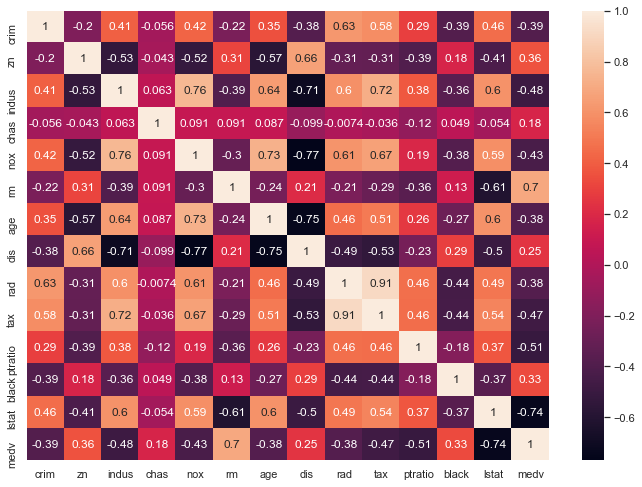

In [134]:
# 1. Heatmap

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot = True)

plt.savefig('heatmap.png')
plt.show()

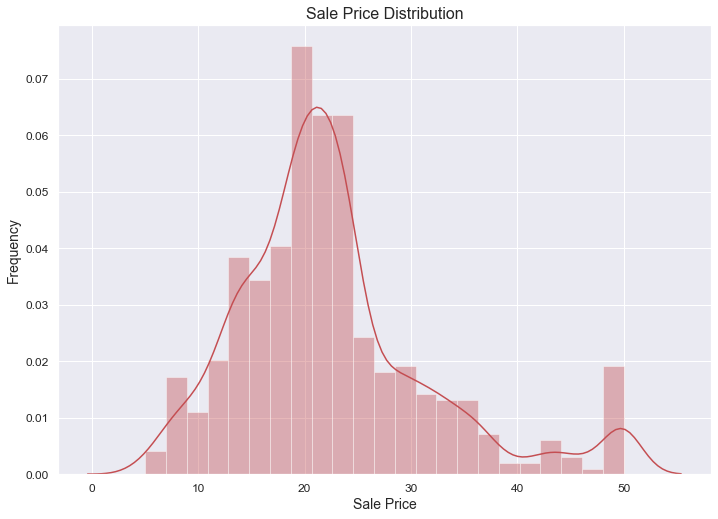

In [135]:
# 2. Distribution plot

sns.distplot(df['medv'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

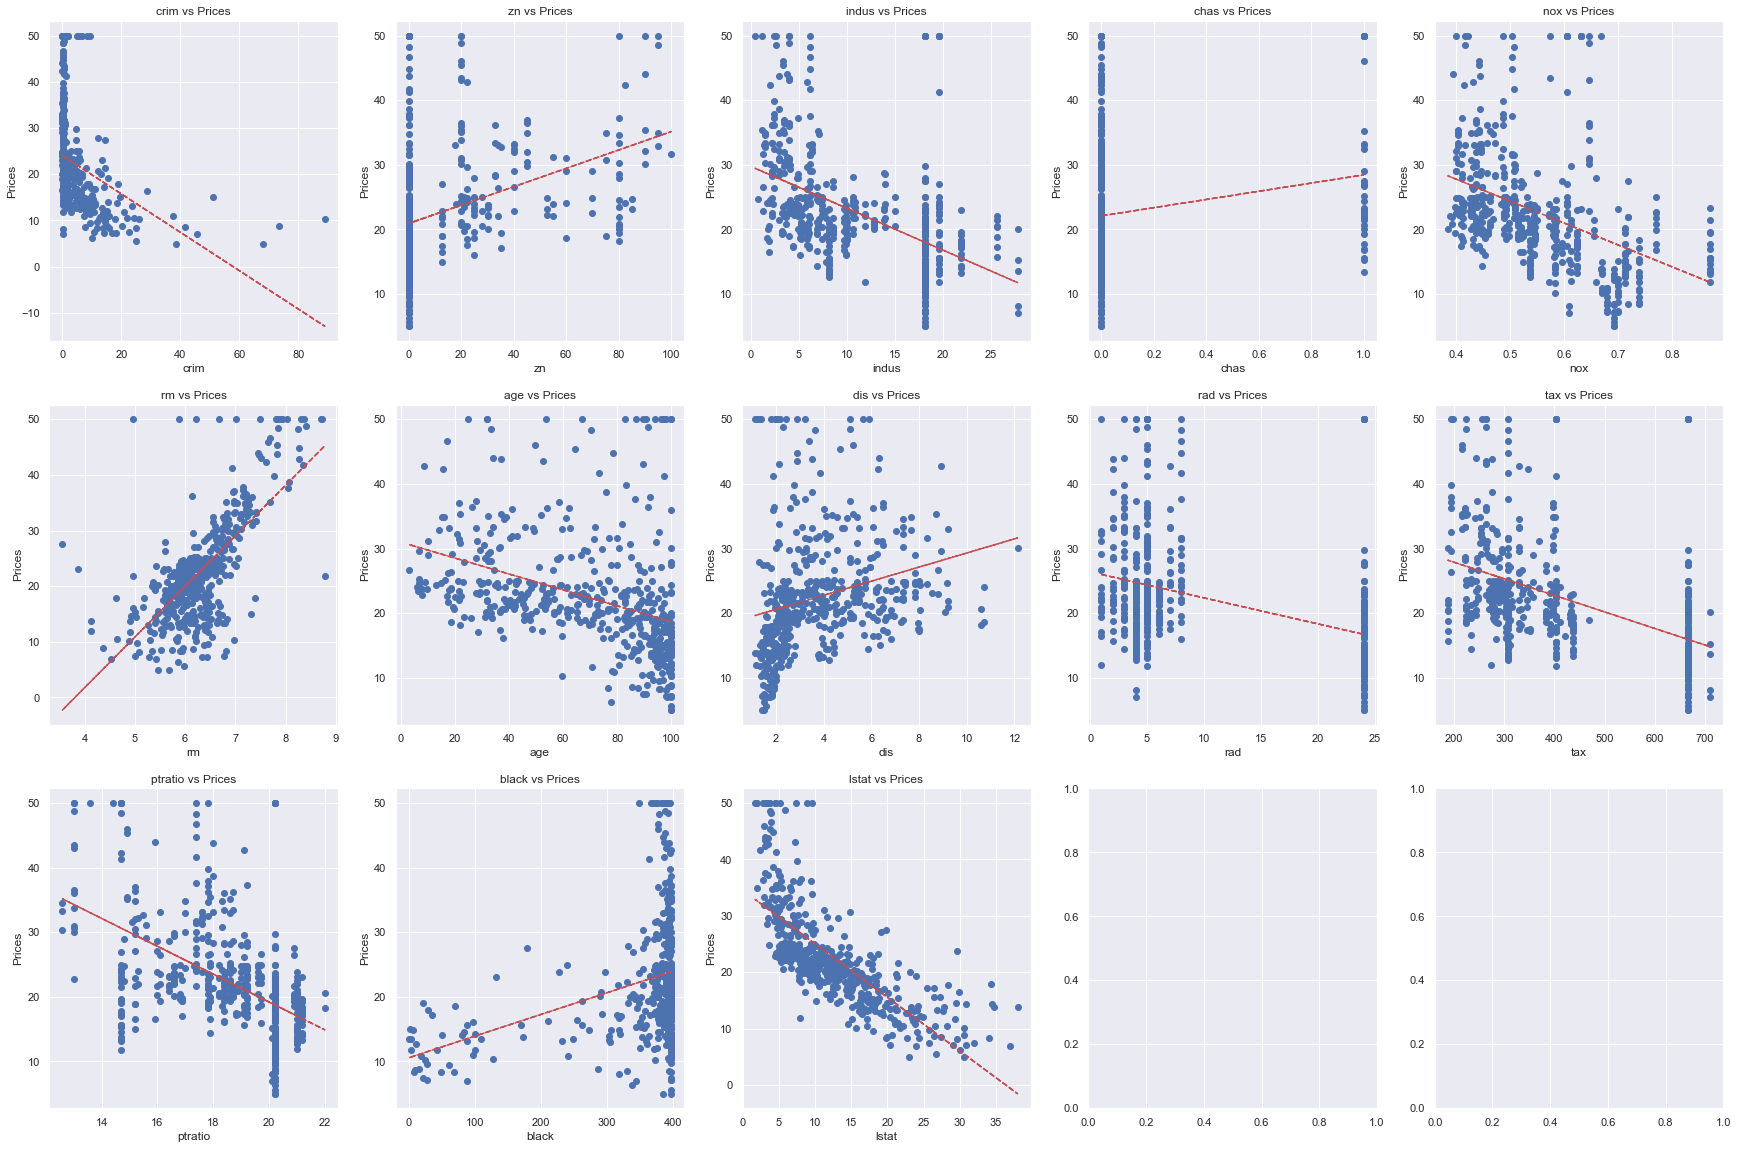

In [136]:
# Scatter Plot

fig, axs = plt.subplots(nrows = 3, ncols=5, figsize=(30, 20))
for i, (ax, col) in enumerate(zip(axs.flat, feature_names)):
    x = X[:,i]
    pf = np.polyfit(x, Y, 1)
    p = np.poly1d(pf)

    ax.plot(x, Y, 'o')
    ax.plot(x, p(x),"r--")

    ax.set_title(col + ' vs Prices')
    ax.set_xlabel(col)
    ax.set_ylabel('Prices') 

## 3. Feature Selection & Prepare training data

In [138]:
feature_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio','black','lstat']
X = df[feature_names].values
Y = df['medv'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## 4. Modeling

#### 4.1. Pre-built algorithms provided by the scikit-learn package in python
https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/

In [142]:
# Using alroithm 

# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, Y_train)
print(ols.coef_)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train,Y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, Y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, Y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, Y_train)
en_yhat = en.predict(X_test)


#6. RandomForestRegression 
rf = RandomForestRegressor(max_depth = 4, random_state=0)
rf.fit(X_train,Y_train)
rf_yhat = rf.predict(X_test)


[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


#### 4.2 Boston Model

https://www.journaldev.com/36576/pytorch-dataloader

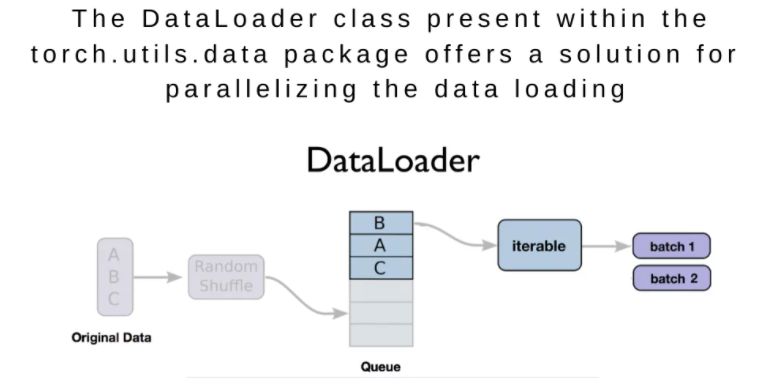



In [143]:
X_train = torch.tensor(X_train).float()
Y_train = torch.tensor(Y_train).view(-1, 1).float()

X_test = torch.tensor(X_test).float()
Y_test = torch.tensor(Y_test).view(-1, 1).float()

datasets = torch.utils.data.TensorDataset(X_train, Y_train)
#batch_size - Number of samples in each batch 
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)



##### Define Model 
###### Input : 13 variables, Output: house price, 3 hidden layers

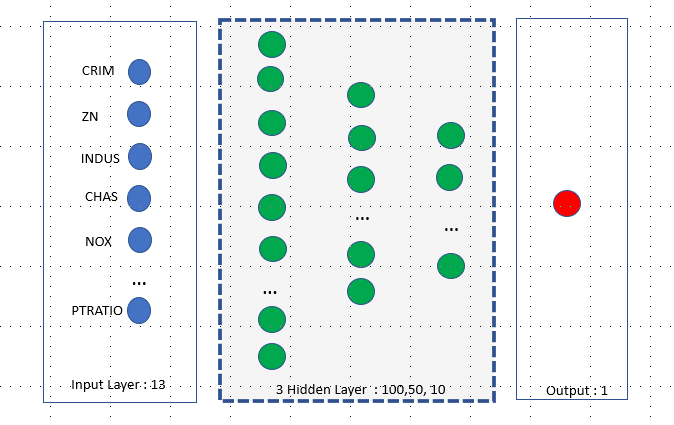

In [144]:
size_input = 13
size_hidden1 = 60
size_hidden2 = 30
size_hidden3 = 10
size_ouput =1

class BostonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(size_input, size_hidden1)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(size_hidden1, size_hidden2)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(size_hidden2, size_hidden3)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(size_hidden3, size_ouput)

    def forward(self, input):
        return self.lin4(self.relu3(self.lin3(self.relu2(self.lin2(self.relu1(self.lin1(input)))))))


https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b

The RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. The difference between RMSprop and gradient descent is on how the gradients are calculated. 

In [145]:
num_epochs = 400
learning_rate = 0.0001
model = BostonModel()

criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

###### Train model

Epoch [1]/[400] running accumulative loss across all batches: 12287.155
Epoch [21]/[400] running accumulative loss across all batches: 2233.413
Epoch [41]/[400] running accumulative loss across all batches: 2049.668
Epoch [61]/[400] running accumulative loss across all batches: 1829.782
Epoch [81]/[400] running accumulative loss across all batches: 1639.445
Epoch [101]/[400] running accumulative loss across all batches: 1472.720
Epoch [121]/[400] running accumulative loss across all batches: 1316.173
Epoch [141]/[400] running accumulative loss across all batches: 1200.258
Epoch [161]/[400] running accumulative loss across all batches: 1123.870
Epoch [181]/[400] running accumulative loss across all batches: 1026.221
Epoch [201]/[400] running accumulative loss across all batches: 955.538
Epoch [221]/[400] running accumulative loss across all batches: 929.297
Epoch [241]/[400] running accumulative loss across all batches: 859.386
Epoch [261]/[400] running accumulative loss across all batc

Text(0.5, 0, 'epoch')

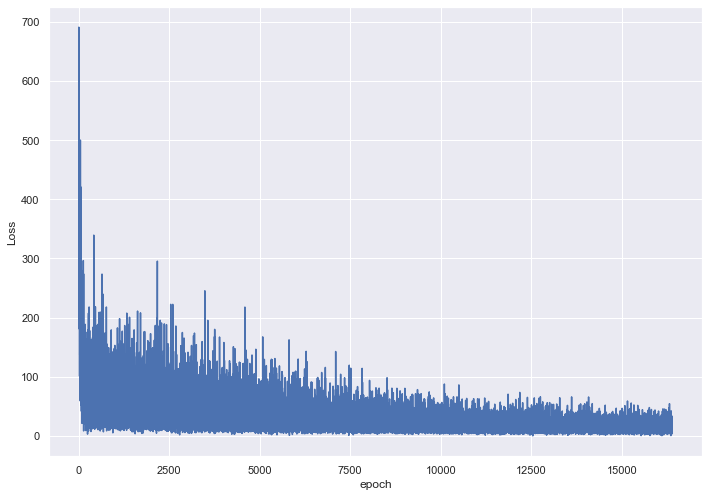

In [146]:
losses =[]
index = 0
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for inputs, labels in train_iter:
        optimizer.zero_grad()

        # get output from the model, given the inputs
        outputs = model(inputs)

        # defining loss
        loss = criterion(outputs, labels)
        losses.append(loss)
        index +=1

        # computing gradients
        loss.backward()
        # accumulating running loss
        running_loss += loss.item()

        # updated weights based on computed gradients
        optimizer.step()
        
    if epoch % 20 == 0:    
        print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
    running_loss = 0.0

print(index)  
plt.plot(range(index),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

## 5. Verification

In [147]:
with torch.no_grad(): # we don't need gradients in the testing phase
    boston_predicted = model(X_test)

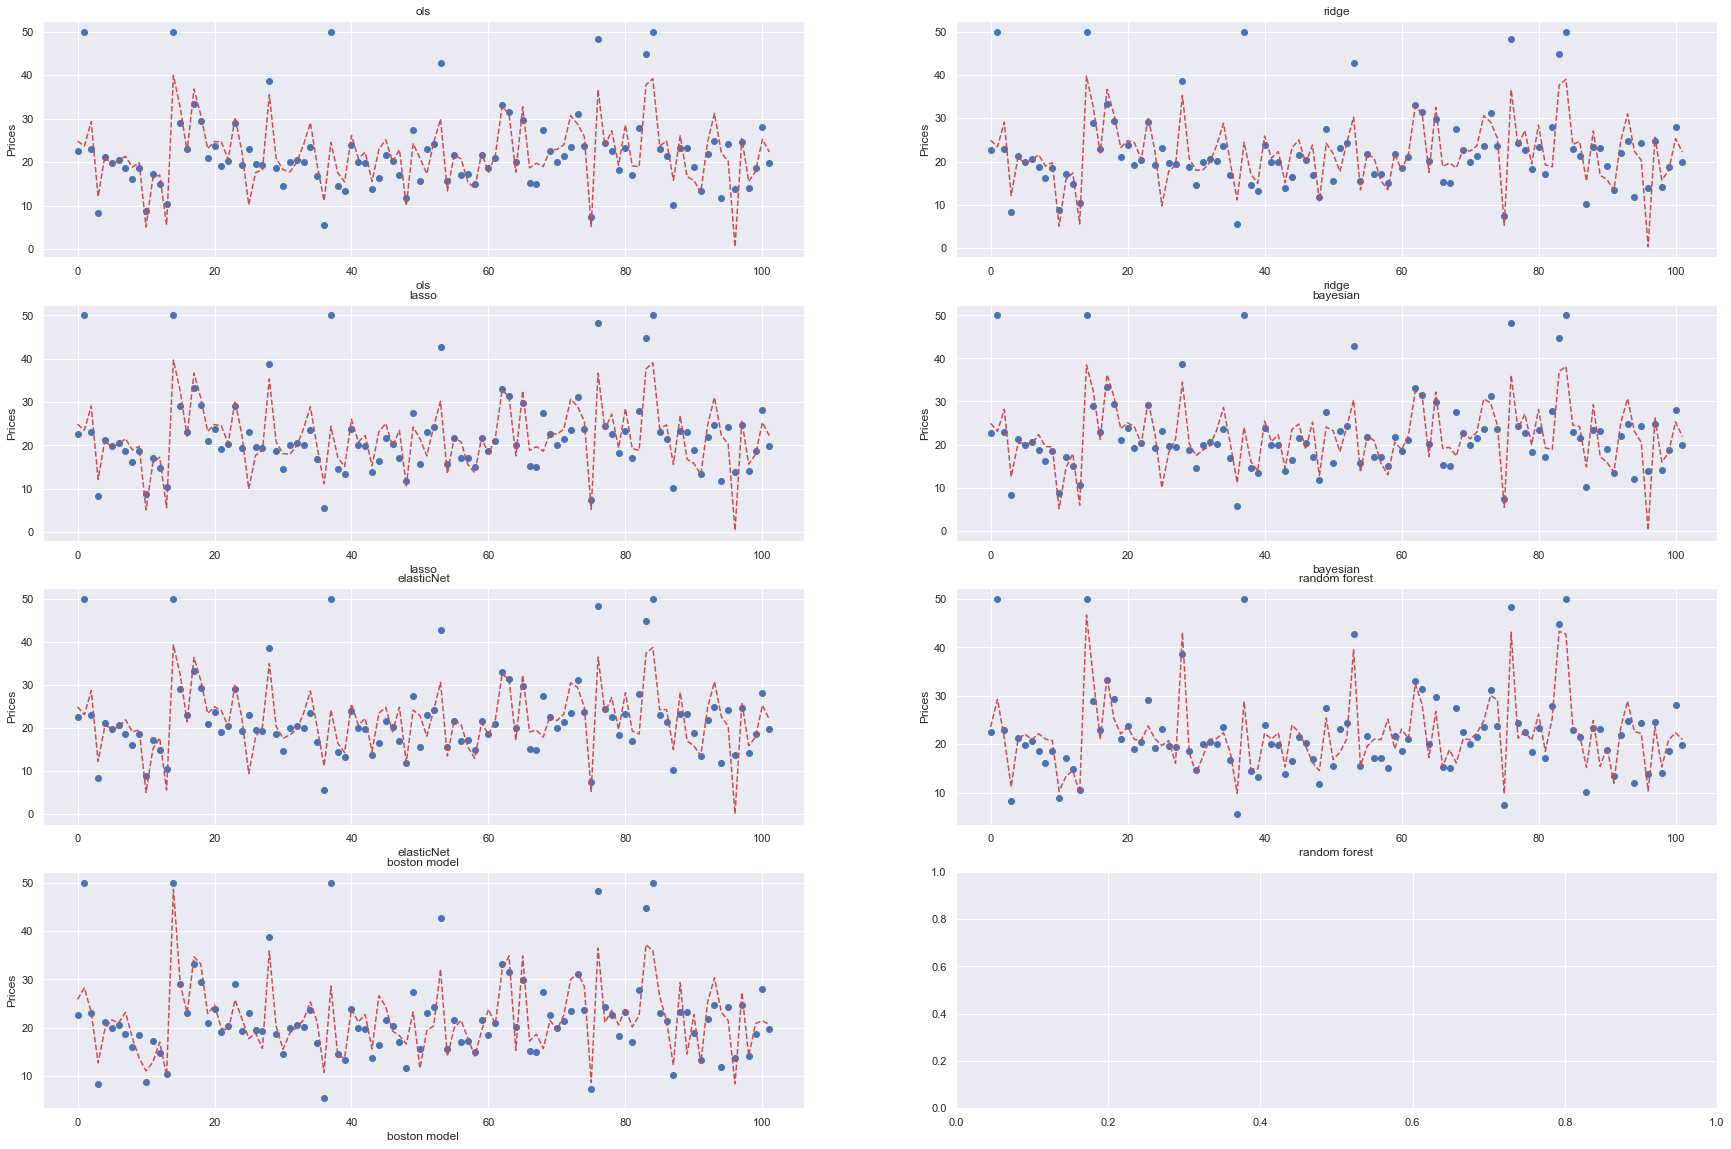

In [154]:
def plot_price(ax,plot_name,x,test_data,predicted_data):
    
    ax.plot(x, test_data, 'o')
    ax.plot(x, predicted_data,"r--")

    ax.set_title(plot_name)
    ax.set_xlabel(plot_name)
    ax.set_ylabel('Prices')  
    

fig, axs = plt.subplots(nrows = 4, ncols=2, figsize=(30, 20))
plot_names =['ols','ridge','lasso','bayesian','elasticNet','random forest','boston model']
x = range(Y_test.shape[0])
    
ax = axs.flat[0]
plot_price(ax,plot_names[0],x,Y_test,ols_yhat)

ax = axs.flat[1]
plot_price(ax,plot_names[1],x,Y_test,ridge_yhat)

ax = axs.flat[2]
plot_price(ax,plot_names[2],x,Y_test,lasso_yhat)

ax = axs.flat[3]
plot_price(ax,plot_names[3],x,Y_test,bayesian_yhat)

ax = axs.flat[4]
plot_price(ax,plot_names[4],x,Y_test,en_yhat)

ax = axs.flat[5]
plot_price(ax,plot_names[5],x,Y_test,rf_yhat)

ax = axs.flat[6]
plot_price(ax,plot_names[6],x,Y_test,boston_predicted)


#### Try to pick top 5 features

In [155]:
feature_names1 = ['rm','lstat','tax','indus','ptratio']
X1 = df[feature_names1].values
Y1 = df['medv'].values

In [156]:

size_input = 5
size_hidden1 = 20
size_hidden2 = 10
size_hidden3 = 5
size_ouput =1

class BostonModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(size_input, size_hidden1)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(size_hidden1, size_hidden2)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(size_hidden2, size_hidden3)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(size_hidden3, size_ouput)

    def forward(self, input):
        return self.lin4(self.relu3(self.lin3(self.relu2(self.lin2(self.relu1(self.lin1(input)))))))


In [157]:
num_epochs = 400
learning_rate = 0.0001
model1 = BostonModel1()

criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state=0)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

X_train1 = torch.tensor(X_train1).float()
Y_train1 = torch.tensor(Y_train1).view(-1, 1).float()

X_test1 = torch.tensor(X_test1).float()
Y_test1 = torch.tensor(Y_test1).view(-1, 1).float()

datasets_1 = torch.utils.data.TensorDataset(X_train1, Y_train1)
#batch_size - Number of samples in each batch 
train_iter1 = torch.utils.data.DataLoader(datasets_1, batch_size=10, shuffle=True)

(404, 5)
(102, 5)
(404,)
(102,)


Epoch [1]/[400] running accumulative loss across all batches: 18415.459
Epoch [21]/[400] running accumulative loss across all batches: 18409.222
Epoch [41]/[400] running accumulative loss across all batches: 18563.075
Epoch [61]/[400] running accumulative loss across all batches: 18570.461
Epoch [81]/[400] running accumulative loss across all batches: 18418.511
Epoch [101]/[400] running accumulative loss across all batches: 18354.078
Epoch [121]/[400] running accumulative loss across all batches: 18449.331
Epoch [141]/[400] running accumulative loss across all batches: 18407.779
Epoch [161]/[400] running accumulative loss across all batches: 18374.969
Epoch [181]/[400] running accumulative loss across all batches: 18700.522
Epoch [201]/[400] running accumulative loss across all batches: 18468.995
Epoch [221]/[400] running accumulative loss across all batches: 18764.790
Epoch [241]/[400] running accumulative loss across all batches: 18828.507
Epoch [261]/[400] running accumulative loss 

Text(0.5, 0, 'epoch')

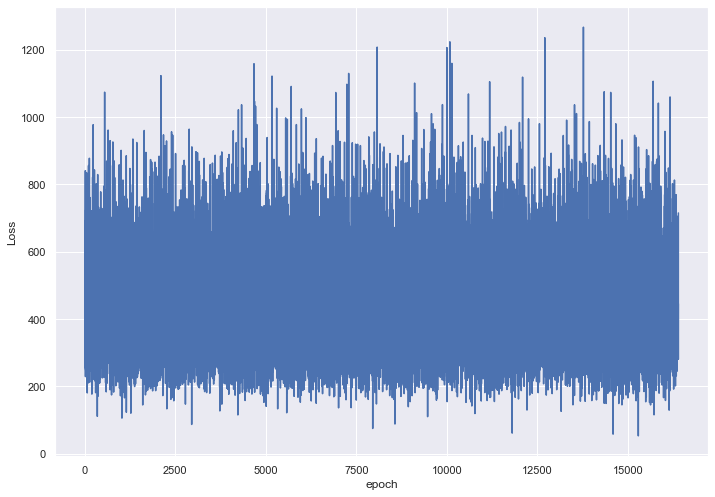

In [158]:
losses =[]
index = 0
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for inputs, labels in train_iter1:
        optimizer.zero_grad()

        # get output from the model, given the inputs
        outputs = model1(inputs)

        # defining loss
        loss = criterion(outputs, labels)
        losses.append(loss)
        index +=1

        # computing gradients
        loss.backward()
        # accumulating running loss
        running_loss += loss.item()

        # updated weights based on computed gradients
        optimizer.step()
        
    if epoch % 20 == 0:    
        print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
    running_loss = 0.0

print(index)  
plt.plot(range(index),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [ ]:
with torch.no_grad(): # we don't need gradients in the testing phase
    boston_predicted1 = model1(X_test1)


In [ ]:
plt.plot(x, Y_test1, 'o')
plt.plot(x, boston_predicted1,"r--")
   